In [2]:
!pip3 install tensorflow

  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached keras-2.9.0-py2.py3-none-any.whl (1.6 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached libclang-14.0.1-py2.py3-none-win_amd64.whl (14.2 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached tensorflow_estimator-2.9.0-py2.py3-none-any.whl (438 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
  Using cached Markdown-3.3.7-py3-none-any.whl (97 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached rsa-4.8-py3-none-any.whl (39 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached 

In [3]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np

In [4]:
base_model=VGG16(weights='imagenet')
model =Model(inputs=base_model.input,outputs=base_model.get_layer('block4_pool').output)

553467096/553467096 [==============================] - 30s 0us/step


In [15]:
!pip install opencv-python

In [21]:
import cv2
 
img = cv2.imread('D:/breastcancer/SOB_B_A-14-22549AB-40-001/')
 
print('Original Dimensions : ',img.shape)
 
# scale_percent = 60 # percent of original size
# width = int(img.shape[1] * scale_percent / 100)
# height = int(img.shape[0] * scale_percent / 100)
# dim = (width, height)
  
# # resize image
# resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
 
# print('Resized Dimensions : ',resized.shape)
 
# cv2.imshow("Resized image", resized)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

AttributeError: 'NoneType' object has no attribute 'shape'

In [28]:
img_path='D:/breastcancer/SOB_B_A-14-22549AB-40-001.png'

img=image.load_img(img_path,target_size=(224,224))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
x=preprocess_input(x)
block4_pool_features=model.predict(x)
print(block4_pool_features.shape)
print(block4_pool_features)

1/1 [==============================] - 0s 165ms/step
(1, 14, 14, 512)
[[[[  0.           0.           0.         ...   0.
      0.           6.6715813 ]
   [  0.           0.           0.         ...   0.
      0.           0.        ]
   [  0.           0.           8.157639   ...   0.
      0.          69.062744  ]
   ...
   [  0.           0.           0.         ...   0.
      0.          51.40018   ]
   [  0.           0.           0.         ...   0.
      0.          71.194336  ]
   [  0.           0.           0.         ...   0.
      0.         234.86894   ]]

  [[  0.           0.           0.         ...   0.
      0.           0.        ]
   [  0.           0.           0.         ...   0.
      0.           0.        ]
   [  0.           0.           0.         ...   0.
      0.           0.        ]
   ...
   [  0.           0.           0.         ...   0.
     36.098892     0.        ]
   [  0.           0.           0.         ...   0.
      0.           0.        ]
 

In [14]:
import os
import numpy as np
import pandas as pd

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
from tensorflow.keras.models import Model
import tensorflow_addons as tfa

from sklearn.metrics import *
import scikitplot as skplt

from functools import partial
# import albumentations as A
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
data = pd.read_csv('D:/semester3/dataset/archive/Folds.csv')
img_dir = 'D:/semester3/dataset/archive/BreaKHis_v1/'
class_names = ['benign', 'malignant']

In [16]:
data = data.rename(columns={'filename':'path'})
data['label'] = data.path.apply(lambda x: x.split('/')[3])
data['label_int'] = data.label.apply(lambda x: class_names.index(x))
data['filename'] = data.path.apply(lambda x: x.split('/')[-1])
data.head(3)

,fold,mag,grp,path,label,label_int,filename
0,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,benign,0,SOB_B_A-14-22549AB-100-001.png
1,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,benign,0,SOB_B_A-14-22549AB-100-002.png
2,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,benign,0,SOB_B_A-14-22549AB-100-003.png


Count of Benign    :  12400
Count of Malignant :  27145


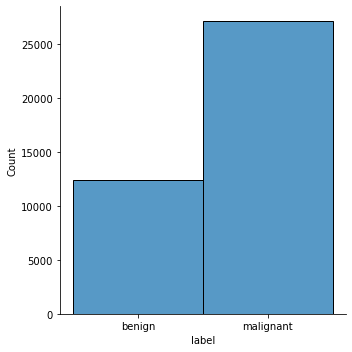

In [17]:
ax = sns.displot(data=data, x='label')
print('Count of Benign    : ', data[data.label == 'benign'].label.count())
print('Count of Malignant : ', data[data.label == 'malignant'].label.count())

In [ ]:
#Fuzzy K means

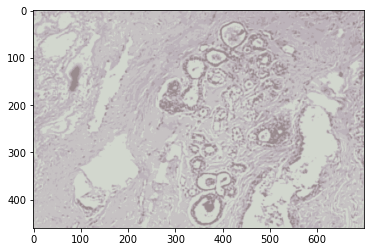

In [6]:
""" Image Segmentation """
import cv2
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np
from matplotlib import pyplot as plt
import cv2
img = cv2.imread("D:/breastcancer/SOB_B_A-14-22549AB-40-001.png", cv2.IMREAD_UNCHANGED) 
# img = cv2.imread("birds2.jpg", cv2.IMREAD_UNCHANGED)  
# img = cv2.imread("peppers3.jpg", cv2.IMREAD_UNCHANGED)  
vectorized = img.reshape((-1,3))
kmeans = KMeans(n_clusters=5, random_state = 0, n_init=5).fit(vectorized)
centers = np.uint8(kmeans.cluster_centers_)
segmented_data = centers[kmeans.labels_.flatten()]
 
segmented_image = segmented_data.reshape((img.shape))
plt.imshow(segmented_image)


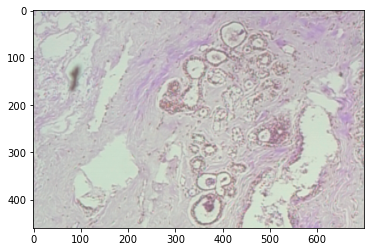

In [16]:
orgimg = cv2.imread("D:/breastcancer/SOB_B_A-14-22549AB-40-001.png") 
plt.imshow(orgimg)

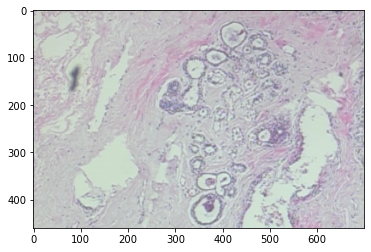

In [17]:
nemo = cv2.cvtColor(orgimg, cv2.COLOR_BGR2RGB)
plt.imshow(nemo)
plt.show()

In [18]:
hsv_nemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)

In [22]:
light_pink = (110,40,145)
dark_pink = (150,190,255)


In [23]:
from matplotlib.colors import hsv_to_rgb

In [24]:
lo_square = np.full((10, 10, 3), light_pink, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_pink, dtype=np.uint8) / 255.0

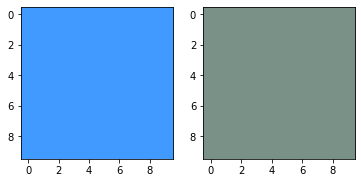

In [25]:
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

In [26]:
mask = cv2.inRange(hsv_nemo, light_pink, dark_pink)

In [27]:
result = cv2.bitwise_and(nemo, nemo, mask=mask)

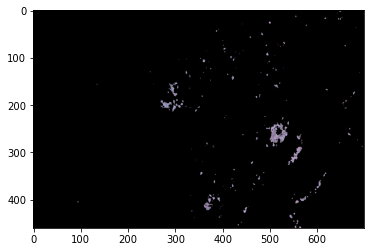

In [28]:
# plt.subplot(1, 2, 1)
# plt.imshow(mask, cmap="gray")
# plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

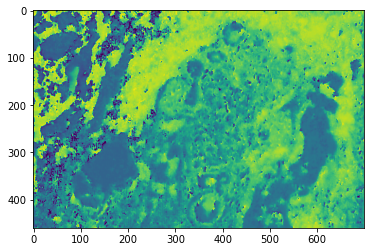

In [2]:
import cv2
from matplotlib import pyplot as plt

# Read image in BGR
img_path = "D:/breastcancer/SOB_B_A-14-22549AB-40-001.png"
img = cv2.imread(img_path)

# Convert BGR to HSV and parse HSV
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = hsv_img[:, :, 0], hsv_img[:, :, 1], hsv_img[:, :, 2]

plt.imshow(h)

# Plot result images
# plt.imshow("Original", cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# plt.imshow("HSV", hsv_img)
# plt.imshow("H", h)
# plt.imshow("S", s)
# plt.imshow("V", v)
# plt.show()





In [12]:
# Blue color
import numpy as np
low_blue = np.array([94, 80, 2])
high_blue = np.array([126, 255, 255])
blue_mask = cv2.inRange(hsv_img, low_blue, high_blue)
blue = cv2.bitwise_and(hsv_img, hsv_img, mask=blue_mask)

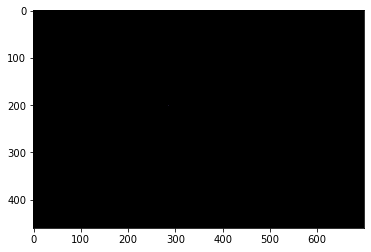

In [15]:
plt.imshow(blue)

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage.morphology import extrema
from skimage.morphology import watershed as skwater

def ShowImage(title,img,ctype):
  if ctype=='bgr':
    b,g,r = cv2.split(img)       # get b,g,r
    rgb_img = cv2.merge([r,g,b])     # switch it to rgb
    plt.imshow(rgb_img)
  elif ctype=='hsv':
    rgb = cv2.cvtColor(img,cv2.COLOR_HSV2RGB)
    plt.imshow(rgb)
  elif ctype=='gray':
    plt.imshow(img,cmap='gray')
  elif ctype=='rgb':
    plt.imshow(img)
  else:
    raise Exception("Unknown colour type")
  plt.title(title)
  plt.show()

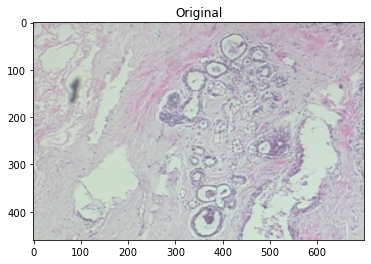

In [5]:
#Read in image
img         = cv2.imread('D:/breastcancer/SOB_B_A-14-22549AB-40-001.png')
ShowImage('Original',img,'bgr')

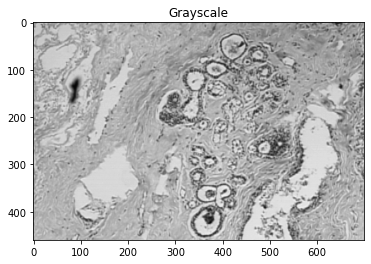

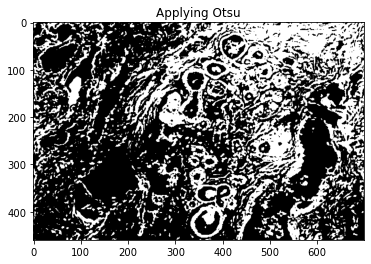

In [6]:
gray        = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#Threshold the image to binary using Otsu's method
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
ShowImage('Grayscale',gray,'gray')
ShowImage('Applying Otsu',thresh,'gray')

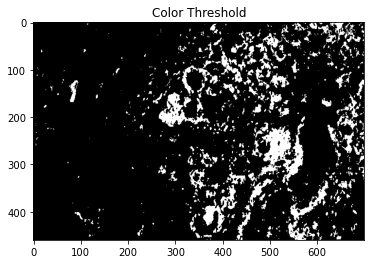

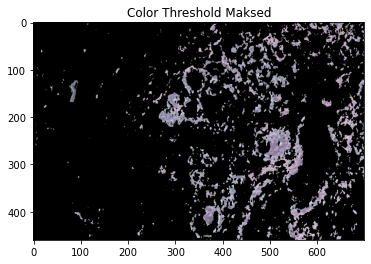

In [37]:
cell_hsvmin  = (80,20,120)  #Lower end of the HSV range defining the nuclei
cell_hsvmax  = (150,190,255) #Upper end of the HSV range defining the nuclei
#Transform image to HSV color space
hsv          = cv2.cvtColor(img,cv2.COLOR_BGR2HSV) 
#Threshold based on HSV values
color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax) 
ShowImage('Color Threshold',color_thresh,'gray')

masked = cv2.bitwise_and(img,img, mask=color_thresh)
ShowImage('Color Threshold Maksed',masked,'bgr')

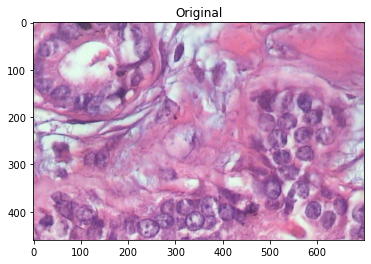

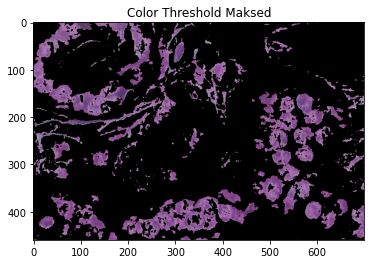

In [4]:
#Read in image
img         = cv2.imread('D:/breastcancer/SOB_B_F-14-29960AB-400-004.png')
ShowImage('Original',img,'bgr')
gray        = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#Threshold the image to binary using Otsu's method
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# ShowImage('Grayscale',gray,'gray')
# ShowImage('Applying Otsu',thresh,'gray')
cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
hsv          = cv2.cvtColor(img,cv2.COLOR_BGR2HSV) 
color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
masked = cv2.bitwise_and(img,img, mask=color_thresh)
ShowImage('Color Threshold Maksed',masked,'bgr')

In [12]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np
base_model=VGG16(weights='imagenet')
model =Model(inputs=base_model.input,outputs=base_model.get_layer('block4_pool').output)


# img=image.load_img(masked ,target_size=(224,224))
x=image.img_to_array(masked)
x=np.expand_dims(x,axis=0)
x=preprocess_input(x)
block4_pool_features=model.predict(x)
print(block4_pool_features.shape)
print(block4_pool_features)

ValueError: in user code:

    File "C:\Users\nived\anaconda3\lib\site-packages\keras\engine\training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\nived\anaconda3\lib\site-packages\keras\engine\training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\nived\anaconda3\lib\site-packages\keras\engine\training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\nived\anaconda3\lib\site-packages\keras\engine\training.py", line 1791, in predict_step
        return self(x, training=False)
    File "C:\Users\nived\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\nived\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "model_4" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, 460, 700, 3)
